In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt  


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

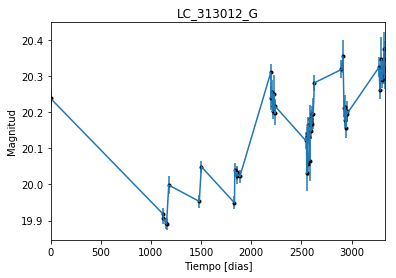

In [2]:
data = np.genfromtxt('LC_313012_G.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_313012_G')
plt.savefig("LC_313012_G.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

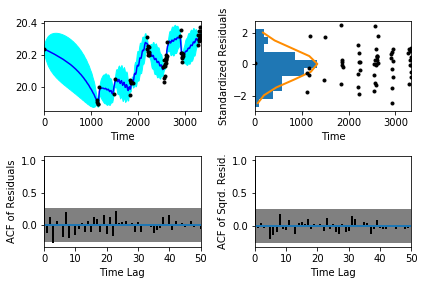

In [5]:
sample.assess_fit()

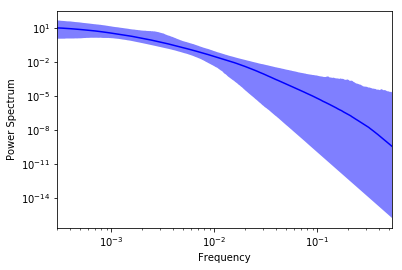

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

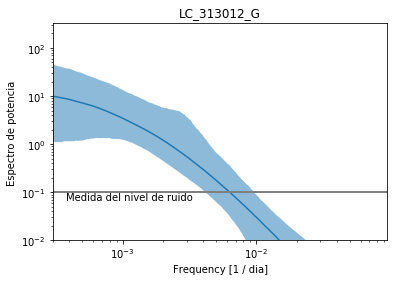

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_313012_G')
plt.savefig("Medida del nivel de ruido_G.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_313012_G')

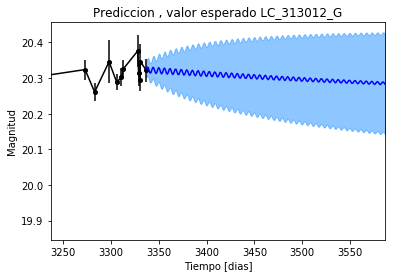

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_313012_G')

Text(0.5,1,'Prediccion, Caminos simulados_LC_313012_G')

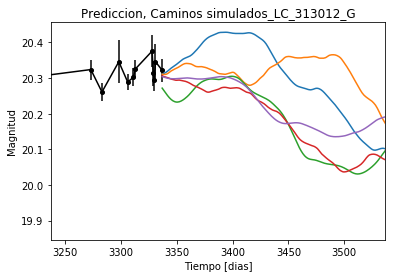

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_313012_G')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


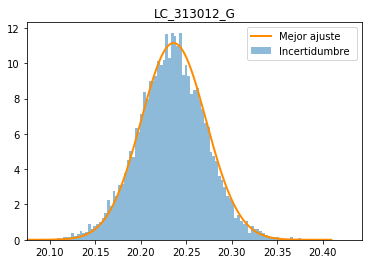

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_313012_G')
plt.savefig("Mejor_ajuste_LC_313012_G.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_313012_G')

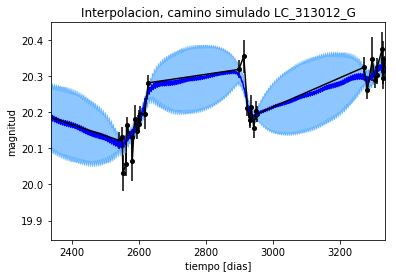

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_G')

Text(0.5,1,'Interpolacion, camino simulado LC_313012_G')

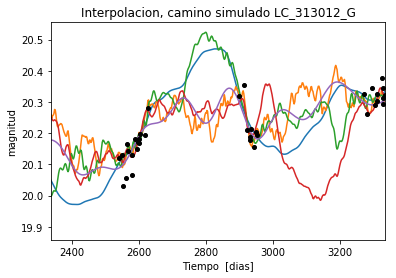

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_313012_G')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 356.158380916
Median: 0.0209474565683
Standard deviation: 0.21768060911
68% credibility interval: [ 0.00176525  0.27145555]
95% credibility interval: [  4.35586815e-04   8.25915058e-01]
99% credibility interval: [  3.25291365e-04   1.01870480e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 379.425383558
Median: 0.00585213381824
Standard deviation: 0.117161650796
68% credibility interval: [ 0.00073044  0.06024053]
95% credibility interval: [  3.44097357e-04   4.08498548e-01]
99% credibility interval: [  3.11879778e-04   8.36967418e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 351.191579799
Median: 0.0436589476001
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1567.53163388
Median: 114.289305411
Standard deviation: 1.71988489065
68% credibility interval: [ 112.31765613  115.47851902]
95% credibility interval: [ 109.73184154  116.21986164]
99% credibility interval: [ 107.66188555  117.24738022]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 277.883886558
Median: 1.06284868099
Standard deviation: 2.68992566186
68% credibility interval: [ 0.12748478  4.76200777]
95% credibility interval: [ 0.0300582   9.85027915]
99% credibility interval: [  0.0136977   12.71365236]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 286.299170314
Median: 1.58393407204
Standard deviation: 13.1656140197
68% credibility interval: [  0.07974283  15.55416038]
95% credibility interval: [  4.48152814e

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 9081.6534025
Median: 5.5665317925e-40
Standard deviation: 3.80766623173e+102
68% credibility interval: [  1.05394008e-85   1.94290405e-14]
95% credibility interval: [  4.45113654e-148   7.64245767e+029]
99% credibility interval: [  4.87732622e-178   2.45535312e+102]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2711.66673182
Median: 20.1606608066
Standard deviation: 0.0775587469382
68% credibility interval: [ 20.09335438  20.23071859]
95% credibility interval: [ 20.01350229  20.32393231]
99% credibility interval: [ 19.93337588  20.41018796]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 357.209674381
Median: 0.0553593236537
Standard deviation: 0.278051339199
68% credibility interval: [ 0.          0.51496989]
95% credibility interval: [ 0.          0.93211545]
99% credibility interval: [ 0.         1.0453454]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 357.209674381
Median: 0.0553593236537
Standard deviation: 0.278051339199
68% credibility interval: [ 0.          0.51496989]
95% credibility interval: [ 0.          0.93211545]
99% credibility interval: [ 0.         1.0453454]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1074.50297596
Median: 0.0
Standard deviation: 0.000621239629646
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1567.53163388
Median: 114.289305411
Standard deviation: 1.71988489065
68% credibility interval: [ 112.31765613  115.47851902]
95% credibility interval: [ 109.73184154  116.21986164]
99% credibility interval: [ 107.66188555  117.24738022]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1845.36014622
Median: 0.0260117985338
Standard deviation: 0.0240109280855
68% credibility interval: [ 0.0163813  0.0451759]
95% credibility interval: [ 0.01100986  0.09086266]
99% credibility interval: [ 0.00885053  0.16304544]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1403.5031397
Median: 1.13700003352
Standard deviation: 0.198824920957
68% credibility interval: [ 0.96004729  1.34953027]
95% credibility interval: [ 0.81059056  1.59513481]
99% credibility interval: [ 0.73281487  1.78542338]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 410.67826823
Median: 0.00188642806583
Standard deviation: 0.286180836181
68% credibility interval: [  2.63307952e-05   4.85778707e-02]
95% credibility interval: [  1.78994206e-33   7.09227834e-01]
99% credibility interval: [  2.10192483e-105   2.18611205e+000]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 356.158380916
Median: (-0.131616751333-0.200192841712j)
Standard deviation: 2.21875096092
68% credibility interval: [-1.70560549+0.j         -0.01109140-0.71877798j]
95% credibility interval: [ -5.18937735e+00+0.j          -2.73687267e-03-1.26764304j]
99% credibility interval: [ -6.40071102e+00+0.j          -2.04386592e-03-0.01746081j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 379.425383558
Median: (-0.0367700412224+0.609154580509j)
Standard deviation: 1.89580891382
68% credibility interval: [-0.37850240+1.45588444j -0.00458949+0.j        ]
95% credibility interval: [ -2.56667208e+00+0.90102019j  -2.16202746e-03+0.j        ]
99% credibility interval: [ -5.25882138e+00+3.66474021j  -1.95959844e-03+0.j        ]
Pos